## Importing Dependencies

In [23]:
import numpy as np
from PIL import Image
import keras
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D

## Preprocessing The Images

Next we'll use the keras ImageDataGenerator to load and preprocess the images in the dataset. This will convert the images to a format that can be fed into the model and will also apply any necessary transformations to the images, such as resizing or normalizing the pixel values. We'll do this for both the training and testing datasets. 

Rescale is a value by which we will multiply the data before any other processing. Our original images consist in RGB coefficients in the 0-255, but such values would be too high for our model to process (given a typical learning rate), so we target values between 0 and 1 instead by scaling with a 1/255. factor 

In [3]:
train_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255) 

In [66]:
trainset = train_datagen.flow_from_directory(
    r'is that santa/train',
    target_size=(150,150),
    class_mode = 'binary',
    batch_size=32
)

testset = test_datagen.flow_from_directory(
    r'is that santa/test',
    target_size=(150,150),
    class_mode = 'binary',
    batch_size=32
)


Found 614 images belonging to 2 classes.
Found 616 images belonging to 2 classes.


## Build Our Model 

Now that our dataset is loaded, we can start building our model. We will be using a convolutional neural network (CNN) for our image classification model.

A convolutional neural network (CNN) is like a group of elves working together in Santa's workshop to sort through presents and determine which ones belong to which child. Each elf has a specific task, such as examining the wrapping paper or looking for the child's name on a tag. These elves are like the different layers in the CNN, each one performing a specific operation on the input data.

As the presents move through the workshop, the elves pass them along to the next layer until they reach the final layer, which makes the final decision on which child the present belongs to. This final layer is like the output layer in a CNN, where the output of the network is determined.

Overall, a CNN uses multiple layers of calculations to analyze and process input data, ultimately making a prediction or classification based on that data.

!['image of how a deep learning model works'](imageofnn.png)

In [68]:
model = keras.models.Sequential(
[Conv2D(16,(3,3),input_shape = (150,150,3),activation = 'relu'),
MaxPooling2D(2,2),
Conv2D(32,(3,3),activation = 'relu'),
MaxPooling2D(2,2),
Conv2D(64,(3,3),activation = 'relu'),
MaxPooling2D(2,2),
Flatten(),
Dense(512,activation = 'relu'),
Dense(1,activation = 'sigmoid')])


Let's visualise our model

In [69]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 74, 74, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 17, 17, 64)      

## Compile the Optimser 

This will be what will observe the loss and adjust the weights and biases to improve it. 

In [71]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

## Train our Model

In [73]:
model.fit(trainset, epochs=10, batch_size=32, validation_data=testset,
steps_per_epoch=len(trainset),
validation_steps=len(testset));

Epoch 1/10
20/20 [==============================] - ETA: 0s - loss: 1.4276 - accuracy: 0.6580

2022-12-10 10:55:20.433320: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


20/20 [==============================] - 8s 407ms/step - loss: 1.4276 - accuracy: 0.6580 - val_loss: 0.4832 - val_accuracy: 0.8149
Epoch 2/10
20/20 [==============================] - 7s 378ms/step - loss: 0.4079 - accuracy: 0.8388 - val_loss: 0.4602 - val_accuracy: 0.8003
Epoch 3/10
20/20 [==============================] - 7s 372ms/step - loss: 0.4854 - accuracy: 0.8485 - val_loss: 0.3260 - val_accuracy: 0.8588
Epoch 4/10
20/20 [==============================] - 7s 347ms/step - loss: 0.2414 - accuracy: 0.8958 - val_loss: 0.3978 - val_accuracy: 0.8166
Epoch 5/10
20/20 [==============================] - 7s 379ms/step - loss: 0.2368 - accuracy: 0.8893 - val_loss: 0.2363 - val_accuracy: 0.8977
Epoch 6/10
20/20 [==============================] - 7s 370ms/step - loss: 0.2718 - accuracy: 0.9153 - val_loss: 0.4254 - val_accuracy: 0.8231
Epoch 7/10
20/20 [==============================] - 7s 366ms/step - loss: 0.1769 - accuracy: 0.9300 - val_loss: 0.2557 - val_accuracy: 0.8880
Epoch 8/10
20/20 

## Testing Our Model 

In [78]:
from tensorflow.keras.preprocessing import image
testdata1 = image.load_img("is that santa/test/santa/3.Santa.jpg",target_size = (150,150))
import numpy as np
x1=image.img_to_array(testdata1)
x1=np.expand_dims(x1, axis=0)
images = np.vstack([x1])
ans = model.predict(images)
if ans[0][0] == 0:
    print('this is not santa')
else:
    print('this is santa')


1/1 [==============================] - 0s 69ms/step
this is santa


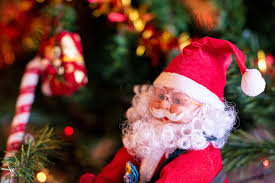

In [79]:
image = Image.open("is that santa/test/santa/3.Santa.jpg")
image